# **PRACTICE-03**

# **Splitting data into training testing and validation sets**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris=load_iris()
data,label=iris.data,iris.target
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
print("Train set shape:",x_train.shape,y_train.shape)
print("Test set shape:",x_test.shape,y_test.shape)
print("Train set shape:",x_val.shape,y_val.shape)

Train set shape: (96, 4) (96,)
Test set shape: (30, 4) (30,)
Train set shape: (24, 4) (24,)


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
mnist=fetch_openml("mnist_784",version=1,cache=True)

data,label=mnist.data.astype(np.float32),mnist.target.astype(np.int32)
data=data/255.0
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
print("Train set shape:",x_train.shape,y_train.shape)
print("Test set shape:",x_test.shape,y_test.shape)
print("Train set shape:",x_val.shape,y_val.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Train set shape: (44800, 784) (44800,)
Test set shape: (14000, 784) (14000,)
Train set shape: (11200, 784) (11200,)


# **PRACTICE-04**

# **Design a model to predict the housing price from boston dataset using Linear Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [ ]:
import io
df=pd.read_csv("/content/drive/MyDrive/Document from VAM$HI™",index_col=0)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


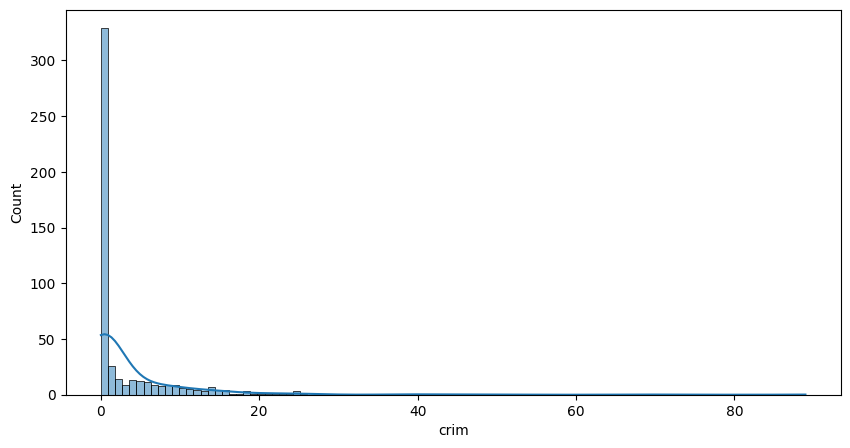

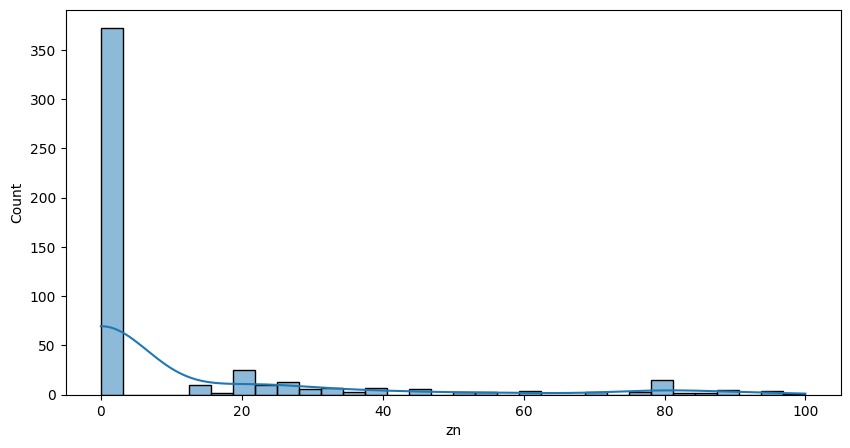

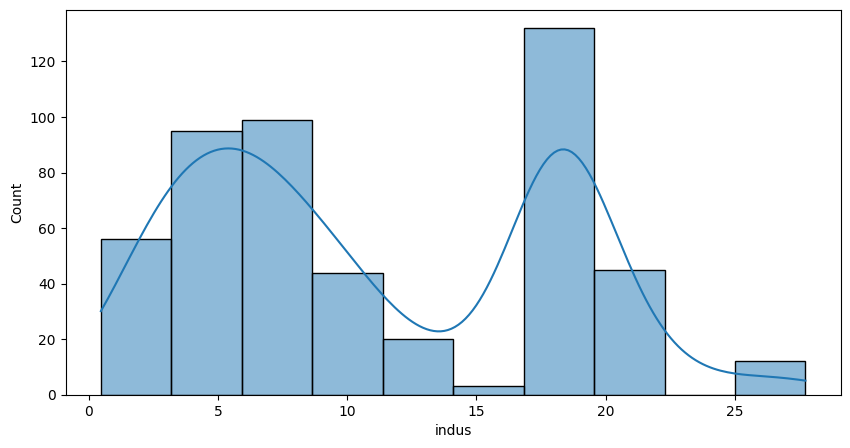

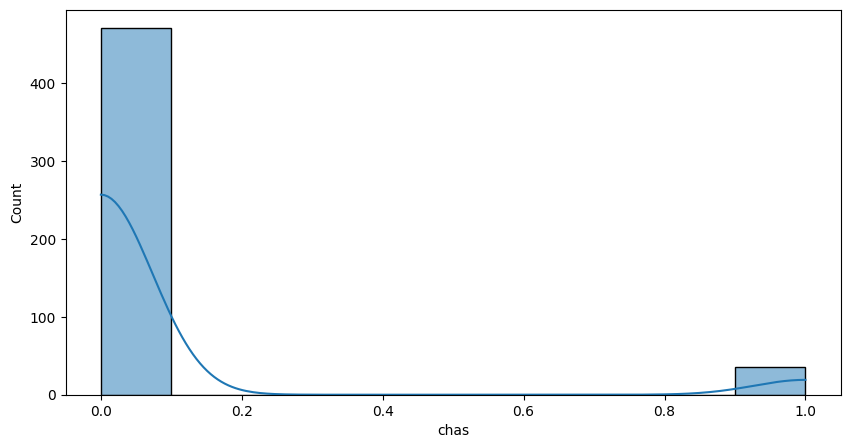

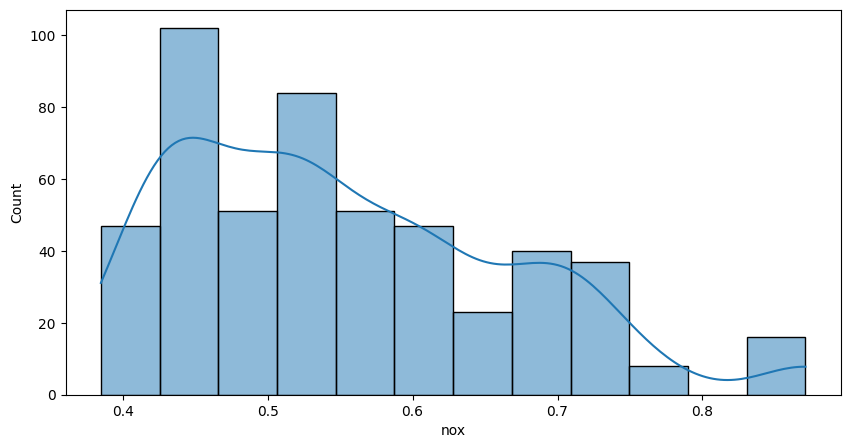

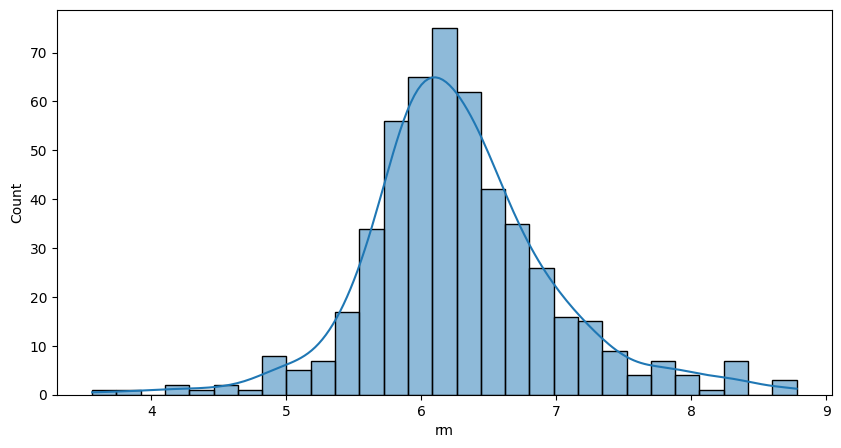

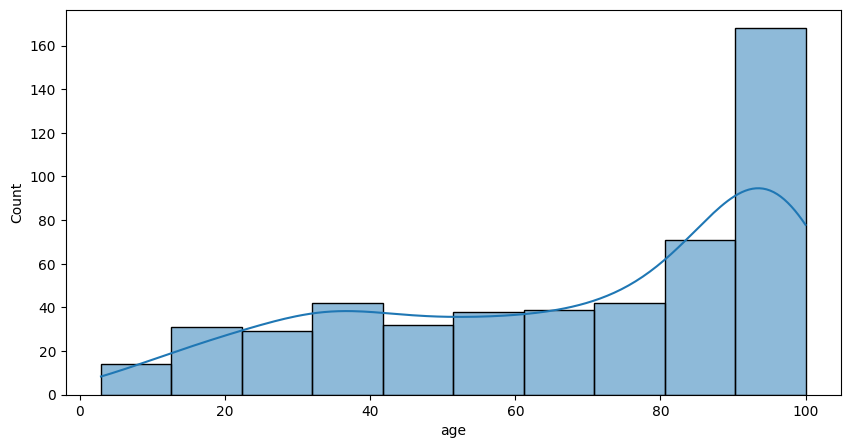

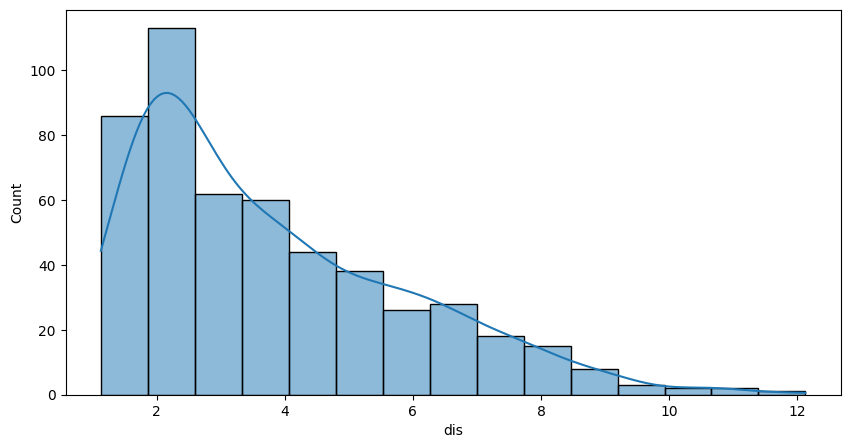

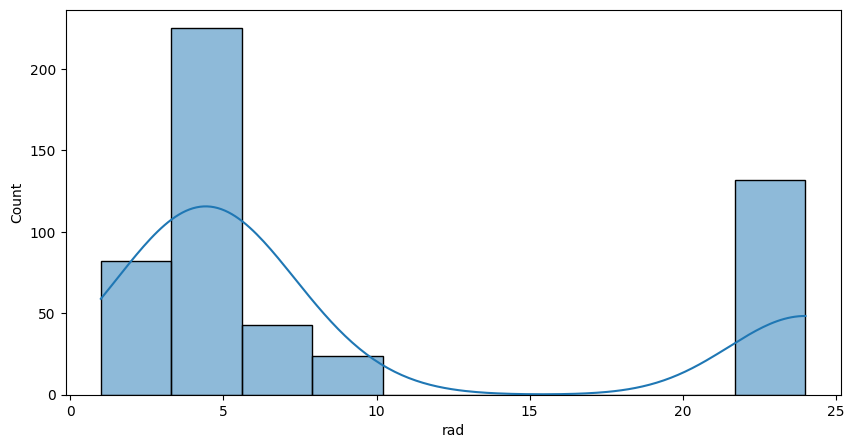

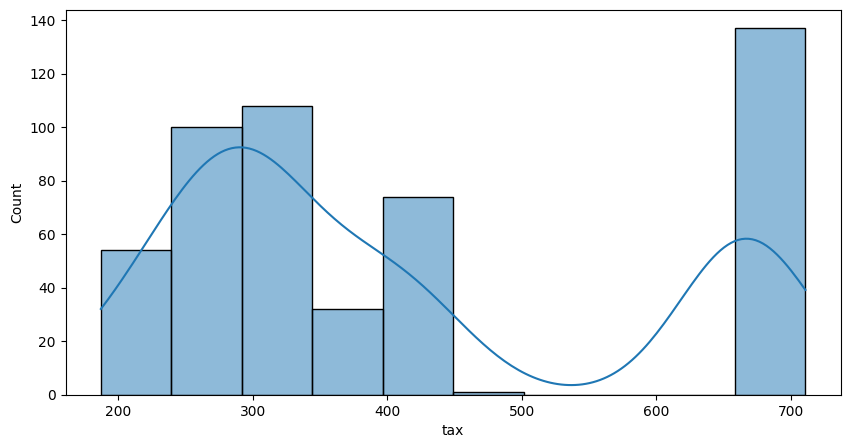

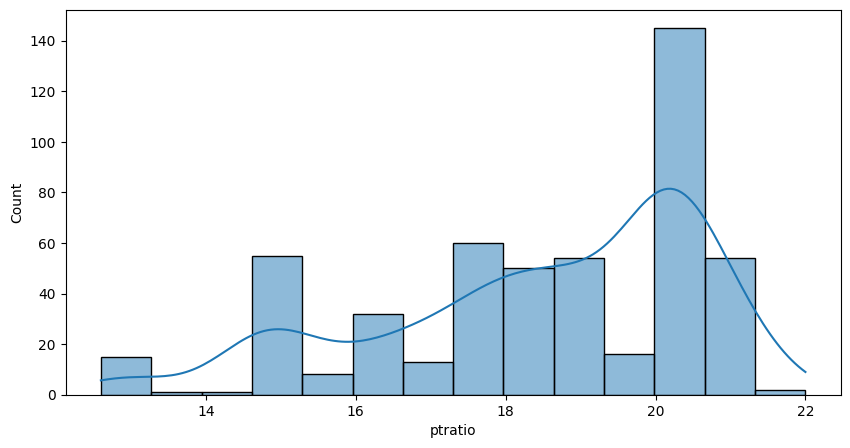

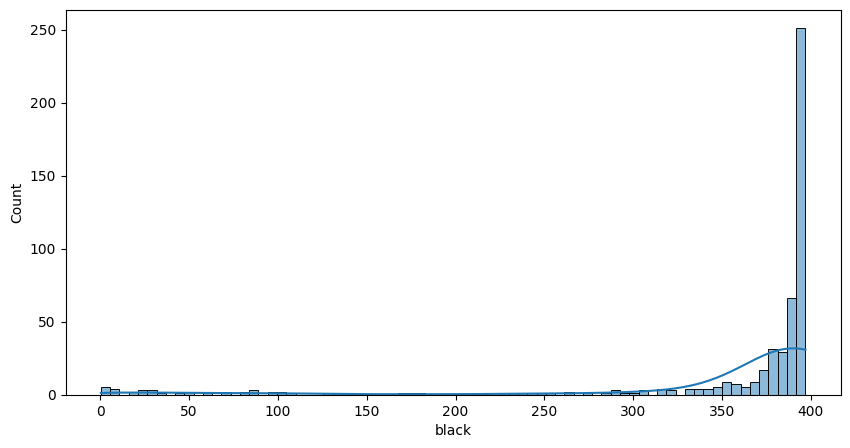

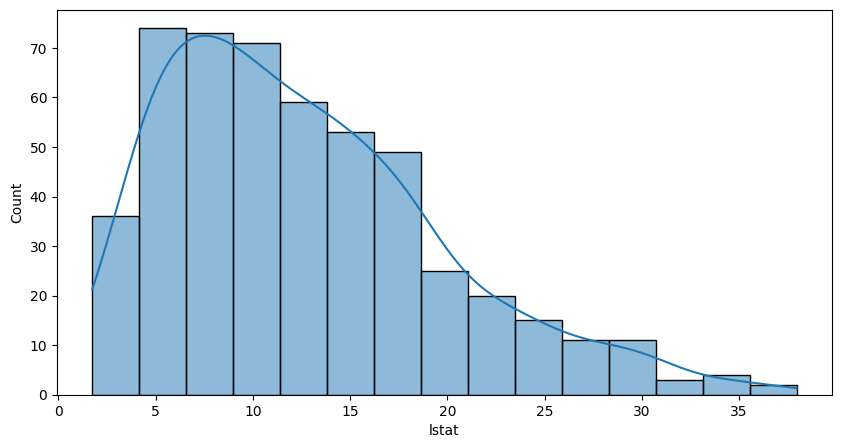

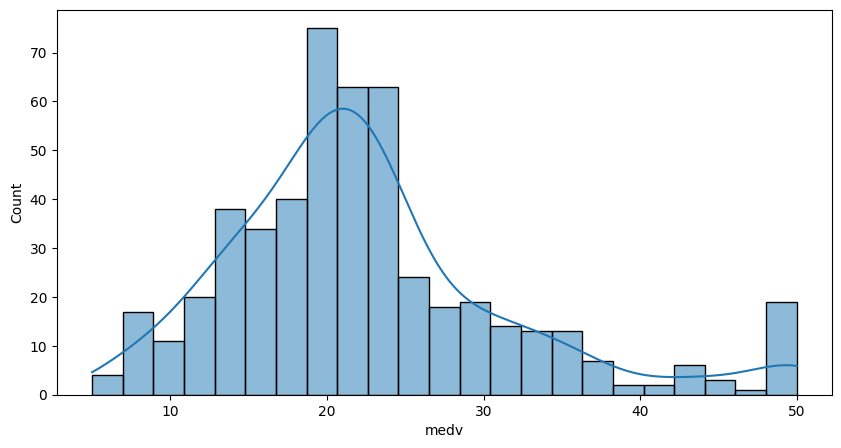

In [ ]:
for i in df.columns:
  plt.figure(figsize=(10,5))
  sns.histplot(data=df,x=i,kde=True)
  plt.show()

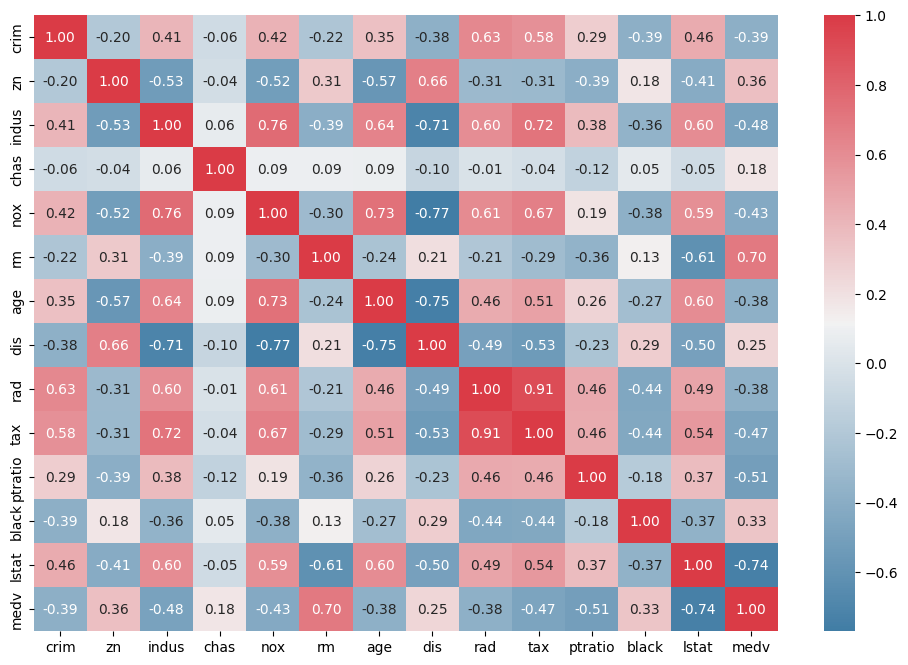

In [ ]:
plt.figure(figsize=(12,8))
cmp=sns.diverging_palette(238,10,as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmp)
plt.show()

In [ ]:
y=df['medv']
x=df.drop(columns=('medv'))
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [ ]:
# prompt: print the x_train  y_train x_test

print("Train set shape:",x_train.shape,y_train.shape)
print("Test set shape:",x_test.shape,y_test.shape)


Train set shape: (354, 13) (354,)
Test set shape: (152, 13) (152,)


In [ ]:
# prompt: import linear regression model and mean square error and apply above xtrain data to linear regression

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print(reg.coef_)
print(reg.intercept_)
print(f"Mean Square Error:{np.mean((y_test-y_pred)**2)}")


[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
31.631084035693327
Mean Square Error:21.517444231177183


In [ ]:
from sklearn.metrics import r2_score
y_train_predict=reg.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2=r2_score(y_train,y_train_predict)
print("The model performance for training set")
print("--------------------")
print("RMSE IS {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

y_test_predict=reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_predict)))
r2=r2_score(y_test,y_test_predict)
print("The model performance for testing set")
print("--------------------")
print("RMSE IS {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

The model performance for training set
--------------------
RMSE IS 4.748208239685937
R2 score is 0.7434997532004697


The model performance for testing set
--------------------
RMSE IS 4.638689926172818
R2 score is 0.7112260057484936




In [ ]:
l=df.iloc[0]
re=reg.coef_.tolist()
su=31.63426
print(len(l))
print(len(re))

14
13


In [ ]:
for i in range(len(l)-1):
  su+=l[i]*re[i]
print(su)
print(l[13]-su)

28.54508345058393
-4.545083450583931


# **HOME** **WORK** **ON** **DIABETES** **DATASET**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
# Load the diabetes dataset
diabetes = load_diabetes()

# Split the dataset into training and testing sets
X,y=diabetes.data,diabetes.target
y=(y>np.median(y)).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# prompt: import linear regression

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train_, y_train)
print(reg.coef_)
print(reg.intercept_)
y_pred=reg.predict(x_test)
print(reg.coef_)
print(reg.intercept_)
print(f"Mean Square Error:{np.mean((y_test-y_pred)**2)}")


[ 0.01508823 -0.09479301  0.11263765  0.09952542 -0.24059166  0.14783869
  0.00359901  0.03840448  0.20018044  0.00477704]
0.5127478753541076
[ 0.01508823 -0.09479301  0.11263765  0.09952542 -0.24059166  0.14783869
  0.00359901  0.03840448  0.20018044  0.00477704]
0.5127478753541076
Mean Square Error:0.2432912672690197


In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred=reg.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train,y_pred)))
r2=r2_score(y_train,y_pred)
print("The model performance for training set")
print("--------------------")
print("RMSE IS {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

y_test_predict=reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_predict)))
r2=r2_score(y_test,y_test_predict)
print("The model performance for testing set")
print("--------------------")
print("RMSE IS {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

The model performance for training set
--------------------
RMSE IS 0.49132715194238347
R2 score is 0.033762432458096625


The model performance for testing set
--------------------
RMSE IS 0.4932456459706661
R2 score is 0.01678054691943598


